# Assignment - 16 (Neural Networks)

## 1. Forest Fire
###### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
# installing Libraries
!pip install tensorflow
!pip install Keras
# import Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [2]:
# import dataset
data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Assignments(Data Science)\16. Neural Networks\forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


#### EDA 

In [3]:
# info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
# Rows & column in dataset
data.shape

(517, 31)

In [5]:
# Descriptive Analysis
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Checking null value in dataset
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
# Creating copy of dataset
dataz=data.copy()
dataz

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
# Duplicates in data
dataz[dataz.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
dataz["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [10]:
dataz["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [11]:
dataz=data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]

In [12]:
dataz

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [13]:
# Correlation in data
corr=dataz.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


#### Visualization

<AxesSubplot:>

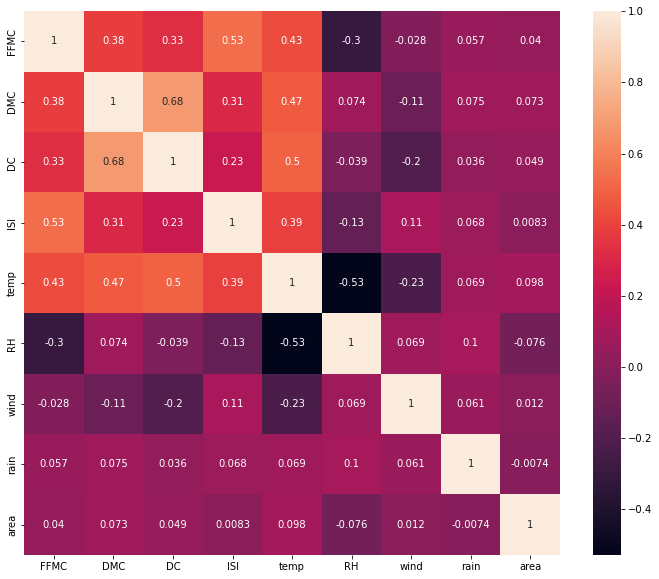

In [14]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

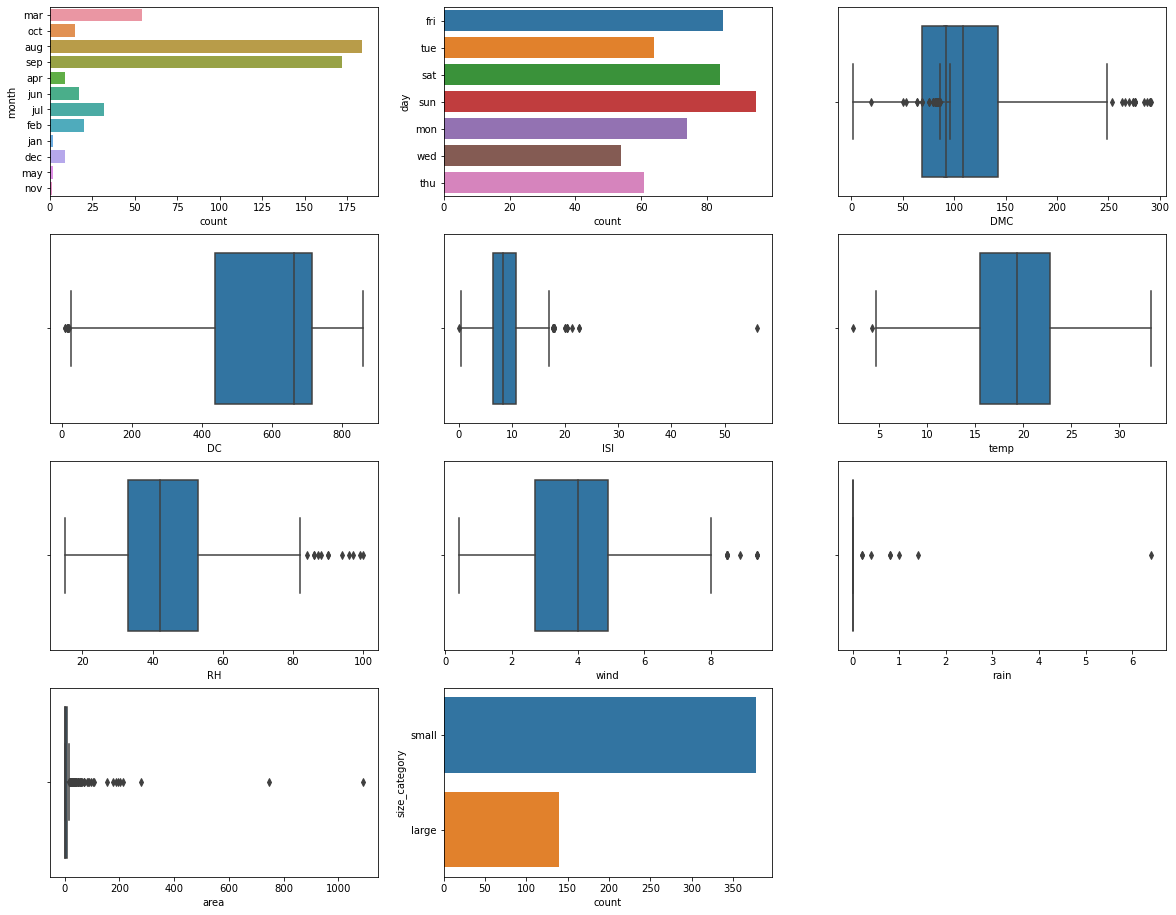

In [15]:
# subplots and boxplots
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=dataz, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=dataz, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x=dataz["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=dataz["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x=dataz["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x=dataz["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x=dataz["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x=dataz["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x=dataz["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x=dataz["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x=dataz["area"])]

[plt.subplot(4,3,11), sns.countplot(data=dataz, y='size_category')];

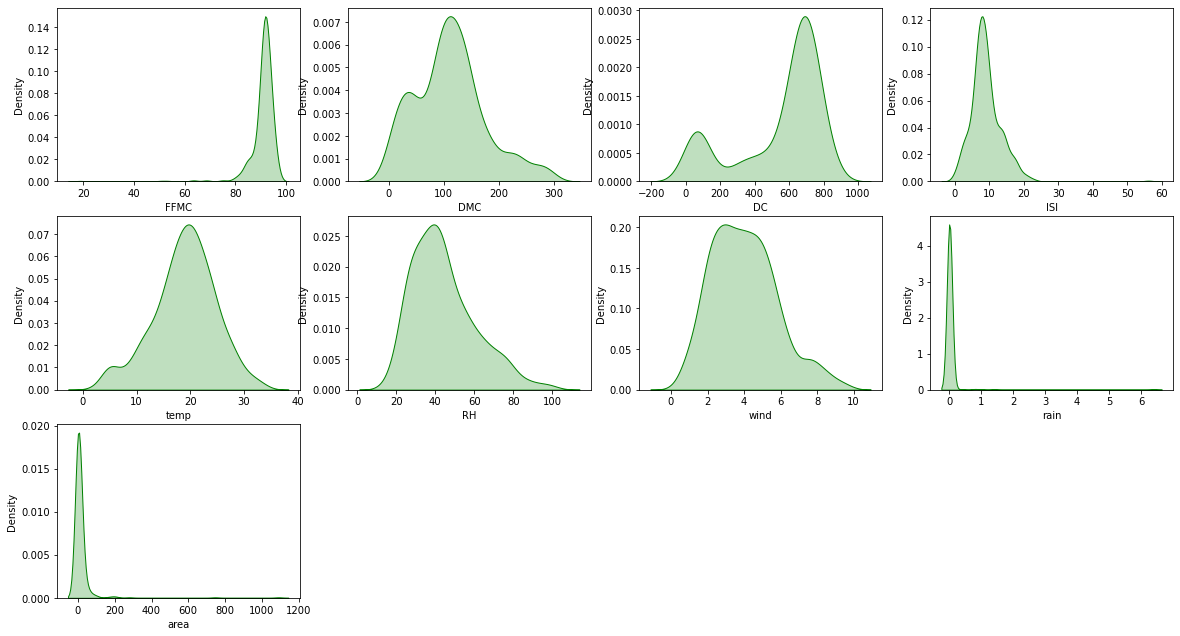

In [16]:
# Density plots
no_columns = dataz.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(dataz[column],color='g',shade=True)

Text(0, 0.5, 'Rate')

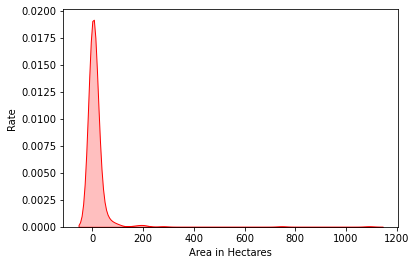

In [17]:
sns.kdeplot(dataz['area'],shade=True,color='r')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

([<AxesSubplot:title={'center':'v'}>,
  <AxesSubplot:title={'center':'v'}>,
  Text(0.5, 1.0, 'v')],
 [<AxesSubplot:xlabel='FFMC'>, <AxesSubplot:xlabel='FFMC'>])

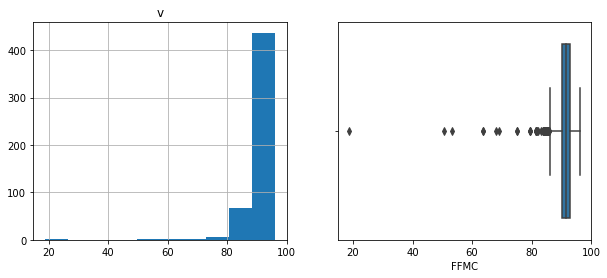

In [18]:
# Histograms & Boxplots
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["FFMC"])]

([<AxesSubplot:title={'center':'DMC'}>,
  <AxesSubplot:title={'center':'DMC'}>,
  Text(0.5, 1.0, 'DMC')],
 [<AxesSubplot:xlabel='DMC'>, <AxesSubplot:xlabel='DMC'>])

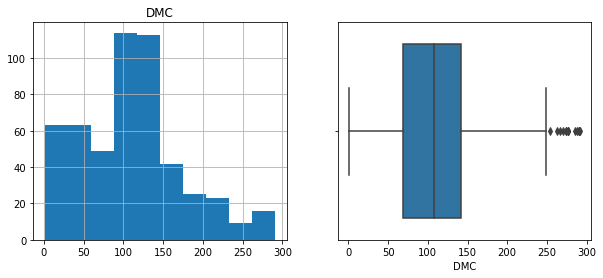

In [19]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["DMC"])]

([<AxesSubplot:title={'center':'DC'}>,
  <AxesSubplot:title={'center':'DC'}>,
  Text(0.5, 1.0, 'DC')],
 [<AxesSubplot:xlabel='DC'>, <AxesSubplot:xlabel='DC'>])

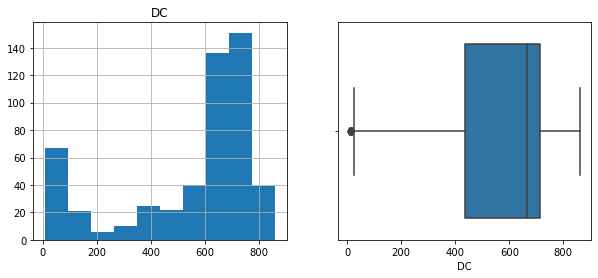

In [20]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["DC"])]

([<AxesSubplot:title={'center':'ISI'}>,
  <AxesSubplot:title={'center':'ISI'}>,
  Text(0.5, 1.0, 'ISI')],
 [<AxesSubplot:xlabel='ISI'>, <AxesSubplot:xlabel='ISI'>])

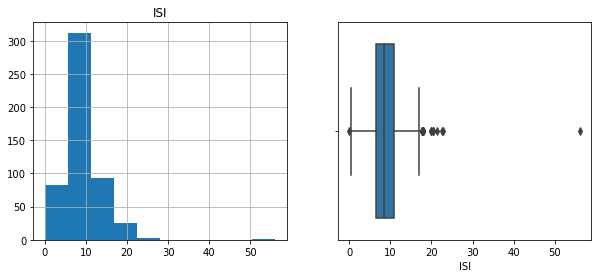

In [21]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["ISI"])]

([<AxesSubplot:title={'center':'temp'}>,
  <AxesSubplot:title={'center':'temp'}>,
  Text(0.5, 1.0, 'temp')],
 [<AxesSubplot:xlabel='temp'>, <AxesSubplot:xlabel='temp'>])

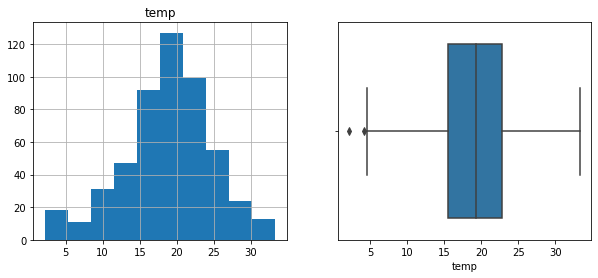

In [22]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["temp"])]

([<AxesSubplot:title={'center':'RH'}>,
  <AxesSubplot:title={'center':'RH'}>,
  Text(0.5, 1.0, 'RH')],
 [<AxesSubplot:xlabel='RH'>, <AxesSubplot:xlabel='RH'>])

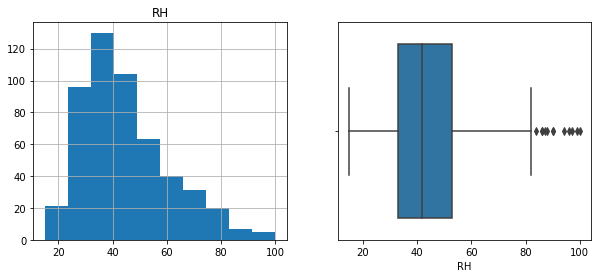

In [23]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["RH"])]

([<AxesSubplot:title={'center':'wind'}>,
  <AxesSubplot:title={'center':'wind'}>,
  Text(0.5, 1.0, 'wind')],
 [<AxesSubplot:xlabel='wind'>, <AxesSubplot:xlabel='wind'>])

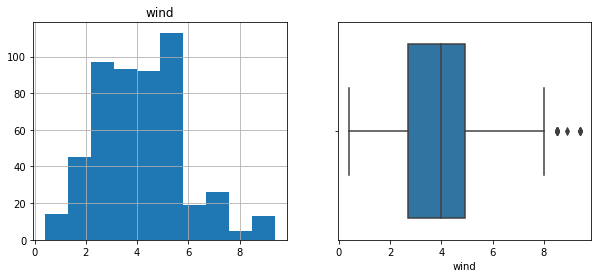

In [24]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["wind"])]

([<AxesSubplot:title={'center':'rain'}>,
  <AxesSubplot:title={'center':'rain'}>,
  Text(0.5, 1.0, 'rain')],
 [<AxesSubplot:xlabel='rain'>, <AxesSubplot:xlabel='rain'>])

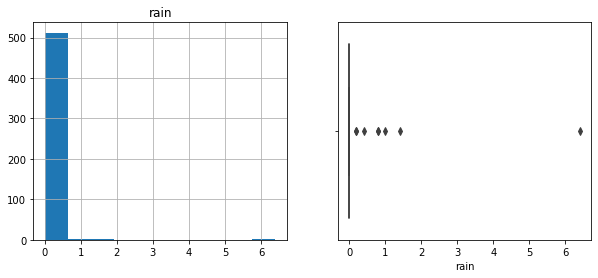

In [25]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["rain"])]

([<AxesSubplot:title={'center':'area'}>,
  <AxesSubplot:title={'center':'area'}>,
  Text(0.5, 1.0, 'area')],
 [<AxesSubplot:xlabel='area'>, <AxesSubplot:xlabel='area'>])

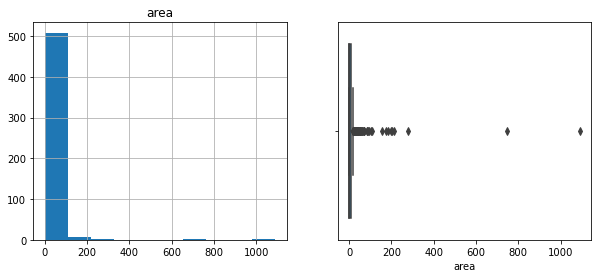

In [26]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),dataz['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=dataz["area"])]

#### Converting categorical data into Label Encoding data

In [27]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])

In [28]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
x=data.iloc[:,2:11]
y=data["size_category"]

In [30]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [32]:
seed=9
np.random.seed(seed)

#### Model Building

In [33]:
model=Sequential()
model.add(Dense(12,input_dim=9,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [34]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model

In [35]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 1s 10ms/step - loss: 37.8181 - accuracy: 0.3757 - val_loss: 7.4182 - val_accuracy: 0.5322
Epoch 2/250
35/35 [==============================] - 0s 3ms/step - loss: 8.3450 - accuracy: 0.6098 - val_loss: 11.9566 - val_accuracy: 0.4386
Epoch 3/250
35/35 [==============================] - 0s 3ms/step - loss: 5.8534 - accuracy: 0.6040 - val_loss: 10.0943 - val_accuracy: 0.4503
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 4.3110 - accuracy: 0.6040 - val_loss: 7.3875 - val_accuracy: 0.4737
Epoch 5/250
35/35 [==============================] - 0s 3ms/step - loss: 2.4371 - accuracy: 0.6387 - val_loss: 3.0116 - val_accuracy: 0.4971
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 1.3506 - accuracy: 0.7081 - val_loss: 0.7212 - val_accuracy: 0.7719
Epoch 7/250
35/35 [==============================] - 0s 4ms/step - loss: 0.9295 - accuracy: 0.7341 - val_loss: 0.5662 - val_accuracy: 0.7953
Epoch 8/2

Epoch 59/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1327 - accuracy: 0.9480 - val_loss: 0.3908 - val_accuracy: 0.8713
Epoch 60/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1326 - accuracy: 0.9480 - val_loss: 0.1166 - val_accuracy: 0.9532
Epoch 61/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9653 - val_loss: 0.1449 - val_accuracy: 0.9181
Epoch 62/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9653 - val_loss: 0.1171 - val_accuracy: 0.9532
Epoch 63/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.9624 - val_loss: 0.1594 - val_accuracy: 0.9123
Epoch 64/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9595 - val_loss: 0.1431 - val_accuracy: 0.9474
Epoch 65/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.9682 - val_loss: 0.1278 - val_accuracy: 0.9181
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9855 - val_loss: 0.0749 - val_accuracy: 0.9708
Epoch 117/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9624 - val_loss: 0.1138 - val_accuracy: 0.9415
Epoch 118/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9653 - val_loss: 0.0667 - val_accuracy: 0.9708
Epoch 119/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9740 - val_loss: 0.2398 - val_accuracy: 0.9064
Epoch 120/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9711 - val_loss: 0.0690 - val_accuracy: 0.9825
Epoch 121/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9827 - val_loss: 0.0715 - val_accuracy: 0.9708
Epoch 122/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9769 - val_loss: 0.2469 - val_accuracy: 0.9123
Epoch 123/250

35/35 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9624 - val_loss: 0.0890 - val_accuracy: 0.9474
Epoch 174/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9855 - val_loss: 0.0931 - val_accuracy: 0.9649
Epoch 175/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9884 - val_loss: 0.1232 - val_accuracy: 0.9474
Epoch 176/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9740 - val_loss: 0.0661 - val_accuracy: 0.9708
Epoch 177/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.1519 - val_accuracy: 0.9474
Epoch 178/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9884 - val_loss: 0.2116 - val_accuracy: 0.9415
Epoch 179/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9827 - val_loss: 0.0672 - val_accuracy: 0.9766
Epoch 180/250

35/35 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9942 - val_loss: 0.0668 - val_accuracy: 0.9649
Epoch 231/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9913 - val_loss: 0.0648 - val_accuracy: 0.9708
Epoch 232/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9798 - val_loss: 0.1226 - val_accuracy: 0.9591
Epoch 233/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9769 - val_loss: 0.0817 - val_accuracy: 0.9532
Epoch 234/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0795 - val_accuracy: 0.9708
Epoch 235/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0966 - val_accuracy: 0.9591
Epoch 236/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9798 - val_loss: 0.0622 - val_accuracy: 0.9708
Epoch 237/250

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
# Visualzation of Training History

fil_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
fil_model.history['accuracy'] 

[0.3757225573062897,
 0.6098265647888184,
 0.6040462255477905,
 0.6040462255477905,
 0.6387283205986023,
 0.7080925107002258,
 0.7341040372848511,
 0.7687861323356628,
 0.7947976589202881,
 0.8381502628326416,
 0.8323699235916138,
 0.8641618490219116,
 0.8612716794013977,
 0.8699421882629395,
 0.8901734352111816,
 0.8930636048316956,
 0.8901734352111816,
 0.884393036365509,
 0.9046242833137512,
 0.884393036365509,
 0.9075144529342651,
 0.9248554706573486,
 0.9046242833137512,
 0.913294792175293,
 0.9161849617958069,
 0.9190751314163208,
 0.9277456402778625,
 0.9219653010368347,
 0.9190751314163208,
 0.9248554706573486,
 0.9364162087440491,
 0.910404622554779,
 0.9306358098983765,
 0.9306358098983765,
 0.9364162087440491,
 0.9421965479850769,
 0.9421965479850769,
 0.9364162087440491,
 0.9248554706573486,
 0.9450867176055908,
 0.9335260391235352,
 0.9421965479850769,
 0.9508670568466187,
 0.9219653010368347,
 0.9364162087440491,
 0.9537572264671326,
 0.9479768872261047,
 0.94219654798507

In [39]:
fil_model.history['val_accuracy']

[0.5321637392044067,
 0.4385964870452881,
 0.4502924084663391,
 0.4736842215061188,
 0.49707603454589844,
 0.7719298005104065,
 0.7953216433525085,
 0.7777777910232544,
 0.8070175647735596,
 0.719298243522644,
 0.8245614171028137,
 0.8070175647735596,
 0.8654970526695251,
 0.8538011908531189,
 0.871345043182373,
 0.8771929740905762,
 0.8304093480110168,
 0.8888888955116272,
 0.859649121761322,
 0.871345043182373,
 0.847953200340271,
 0.847953200340271,
 0.8888888955116272,
 0.8947368264198303,
 0.8830409646034241,
 0.8771929740905762,
 0.8538011908531189,
 0.8830409646034241,
 0.8947368264198303,
 0.8947368264198303,
 0.871345043182373,
 0.9181286692619324,
 0.8947368264198303,
 0.8947368264198303,
 0.8947368264198303,
 0.9122806787490845,
 0.9239766001701355,
 0.8830409646034241,
 0.9122806787490845,
 0.9298245906829834,
 0.9298245906829834,
 0.9298245906829834,
 0.8947368264198303,
 0.8888888955116272,
 0.9239766001701355,
 0.9298245906829834,
 0.9064327478408813,
 0.9181286692619324

In [40]:
fil_model.history['loss'] 

[37.818092346191406,
 8.345046043395996,
 5.853446960449219,
 4.310981750488281,
 2.4371142387390137,
 1.3506139516830444,
 0.9294686913490295,
 0.6559852361679077,
 0.5645394921302795,
 0.5088896751403809,
 0.4973665773868561,
 0.3912608027458191,
 0.40459635853767395,
 0.4346805512905121,
 0.33714917302131653,
 0.31865519285202026,
 0.32404625415802,
 0.36191603541374207,
 0.2947460114955902,
 0.32064762711524963,
 0.2846400737762451,
 0.25101083517074585,
 0.256025493144989,
 0.2548658549785614,
 0.23107987642288208,
 0.2368766963481903,
 0.25843480229377747,
 0.24293412268161774,
 0.23980380594730377,
 0.2210414856672287,
 0.1940360814332962,
 0.23861759901046753,
 0.19235412776470184,
 0.19827987253665924,
 0.21256862580776215,
 0.18240347504615784,
 0.17550815641880035,
 0.17957693338394165,
 0.17979319393634796,
 0.182080939412117,
 0.1895451694726944,
 0.16830047965049744,
 0.14673109352588654,
 0.18174630403518677,
 0.16927166283130646,
 0.1509978026151657,
 0.1466434746980667

In [41]:
fil_model.history['val_loss']

[7.418155193328857,
 11.956552505493164,
 10.094250679016113,
 7.387491703033447,
 3.0115878582000732,
 0.72121661901474,
 0.5662044286727905,
 0.505479633808136,
 0.5795697569847107,
 0.5988002419471741,
 0.5181326866149902,
 0.6636979579925537,
 0.37464040517807007,
 0.36154043674468994,
 0.35686320066452026,
 0.3279338479042053,
 0.4840039610862732,
 0.3025943338871002,
 0.3652210235595703,
 0.30885058641433716,
 0.4537174701690674,
 0.4262126386165619,
 0.27110621333122253,
 0.24763000011444092,
 0.2736942768096924,
 0.32887494564056396,
 0.406116783618927,
 0.2770664691925049,
 0.24939250946044922,
 0.22807371616363525,
 0.3582967221736908,
 0.22129373252391815,
 0.25588086247444153,
 0.23601654171943665,
 0.20494547486305237,
 0.1887873411178589,
 0.18510177731513977,
 0.2774873375892639,
 0.17587602138519287,
 0.17911340296268463,
 0.19215716421604156,
 0.17353755235671997,
 0.2131630778312683,
 0.22667331993579865,
 0.16168509423732758,
 0.1561100333929062,
 0.19088001549243927

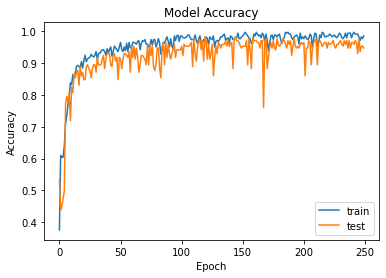

In [42]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['accuracy'])
plt.plot(fil_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

As per graphs, Accuracy on train and test both are almost parallel to each other.

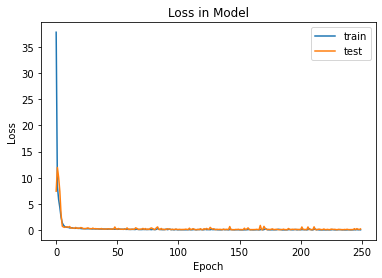

In [43]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Here in this graphs Test line completely overlap on the Train line, it's look like similar

In [44]:
predictions = model.predict(x)

17/17 [==============================] - 0s 976us/step


#### Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [45]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [46]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [47]:
# Compile model
# chaging optimizer older=ada, new=adadelta

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])


In [48]:
# Fit the model
# Change ephocs from 250 to 200

fil_model2=model2.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 1s 8ms/step - loss: 104.3209 - accuracy: 0.2399 - val_loss: 101.6914 - val_accuracy: 0.3099
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 103.9457 - accuracy: 0.2399 - val_loss: 101.3190 - val_accuracy: 0.3099
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 103.5566 - accuracy: 0.2399 - val_loss: 100.9324 - val_accuracy: 0.3099
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 103.1540 - accuracy: 0.2399 - val_loss: 100.5354 - val_accuracy: 0.3099
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 102.7416 - accuracy: 0.2399 - val_loss: 100.1306 - val_accuracy: 0.3099
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 102.3221 - accuracy: 0.2399 - val_loss: 99.7150 - val_accuracy: 0.3099
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 101.8915 - accuracy: 0.2399 - val_loss: 99.2893 - val_accu

Epoch 58/200
35/35 [==============================] - 0s 3ms/step - loss: 72.0323 - accuracy: 0.2399 - val_loss: 70.0360 - val_accuracy: 0.3158
Epoch 59/200
35/35 [==============================] - 0s 3ms/step - loss: 71.3503 - accuracy: 0.2399 - val_loss: 69.3680 - val_accuracy: 0.3158
Epoch 60/200
35/35 [==============================] - 0s 3ms/step - loss: 70.6634 - accuracy: 0.2399 - val_loss: 68.6997 - val_accuracy: 0.3158
Epoch 61/200
35/35 [==============================] - 0s 3ms/step - loss: 69.9769 - accuracy: 0.2399 - val_loss: 68.0313 - val_accuracy: 0.3158
Epoch 62/200
35/35 [==============================] - 0s 3ms/step - loss: 69.2906 - accuracy: 0.2399 - val_loss: 67.3671 - val_accuracy: 0.3158
Epoch 63/200
35/35 [==============================] - 0s 3ms/step - loss: 68.6086 - accuracy: 0.2399 - val_loss: 66.7039 - val_accuracy: 0.3158
Epoch 64/200
35/35 [==============================] - 0s 3ms/step - loss: 67.9251 - accuracy: 0.2399 - val_loss: 66.0337 - val_accuracy:

Epoch 115/200
35/35 [==============================] - 0s 4ms/step - loss: 33.0906 - accuracy: 0.2225 - val_loss: 32.0347 - val_accuracy: 0.2924
Epoch 116/200
35/35 [==============================] - 0s 3ms/step - loss: 32.4148 - accuracy: 0.2225 - val_loss: 31.3710 - val_accuracy: 0.2924
Epoch 117/200
35/35 [==============================] - 0s 4ms/step - loss: 31.7355 - accuracy: 0.2225 - val_loss: 30.7133 - val_accuracy: 0.2924
Epoch 118/200
35/35 [==============================] - 0s 5ms/step - loss: 31.0601 - accuracy: 0.2225 - val_loss: 30.0569 - val_accuracy: 0.2924
Epoch 119/200
35/35 [==============================] - 0s 4ms/step - loss: 30.3862 - accuracy: 0.2225 - val_loss: 29.3994 - val_accuracy: 0.2807
Epoch 120/200
35/35 [==============================] - 0s 3ms/step - loss: 29.7095 - accuracy: 0.2197 - val_loss: 28.7475 - val_accuracy: 0.2749
Epoch 121/200
35/35 [==============================] - 0s 3ms/step - loss: 29.0352 - accuracy: 0.2197 - val_loss: 28.1012 - val_ac

35/35 [==============================] - 0s 3ms/step - loss: 9.8176 - accuracy: 0.4277 - val_loss: 11.3719 - val_accuracy: 0.4211
Epoch 172/200
35/35 [==============================] - 0s 3ms/step - loss: 9.7944 - accuracy: 0.4335 - val_loss: 11.3722 - val_accuracy: 0.4211
Epoch 173/200
35/35 [==============================] - 0s 3ms/step - loss: 9.7742 - accuracy: 0.4335 - val_loss: 11.3728 - val_accuracy: 0.4269
Epoch 174/200
35/35 [==============================] - 0s 3ms/step - loss: 9.7569 - accuracy: 0.4480 - val_loss: 11.3737 - val_accuracy: 0.4269
Epoch 175/200
35/35 [==============================] - 0s 3ms/step - loss: 9.7413 - accuracy: 0.4538 - val_loss: 11.3748 - val_accuracy: 0.4269
Epoch 176/200
35/35 [==============================] - 0s 3ms/step - loss: 9.7263 - accuracy: 0.4538 - val_loss: 11.3752 - val_accuracy: 0.4269
Epoch 177/200
35/35 [==============================] - 0s 3ms/step - loss: 9.7143 - accuracy: 0.4538 - val_loss: 11.3760 - val_accuracy: 0.4269
Epoch 

In [49]:
# Evaluating the Model

score2 = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 722us/step - loss: 10.1567 - accuracy: 0.4816
accuracy: 48.16%


In [50]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fil_model2.history.keys()

(['loss', 'accuracy'],
 [10.15670394897461, 0.4816247522830963],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [51]:
fil_model2.history['accuracy'] 

[0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914

In [52]:
fil_model2.history['val_accuracy']

[0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.3099415

In [53]:
fil_model.history['loss'] 

[37.818092346191406,
 8.345046043395996,
 5.853446960449219,
 4.310981750488281,
 2.4371142387390137,
 1.3506139516830444,
 0.9294686913490295,
 0.6559852361679077,
 0.5645394921302795,
 0.5088896751403809,
 0.4973665773868561,
 0.3912608027458191,
 0.40459635853767395,
 0.4346805512905121,
 0.33714917302131653,
 0.31865519285202026,
 0.32404625415802,
 0.36191603541374207,
 0.2947460114955902,
 0.32064762711524963,
 0.2846400737762451,
 0.25101083517074585,
 0.256025493144989,
 0.2548658549785614,
 0.23107987642288208,
 0.2368766963481903,
 0.25843480229377747,
 0.24293412268161774,
 0.23980380594730377,
 0.2210414856672287,
 0.1940360814332962,
 0.23861759901046753,
 0.19235412776470184,
 0.19827987253665924,
 0.21256862580776215,
 0.18240347504615784,
 0.17550815641880035,
 0.17957693338394165,
 0.17979319393634796,
 0.182080939412117,
 0.1895451694726944,
 0.16830047965049744,
 0.14673109352588654,
 0.18174630403518677,
 0.16927166283130646,
 0.1509978026151657,
 0.1466434746980667

In [54]:
fil_model.history['val_loss']

[7.418155193328857,
 11.956552505493164,
 10.094250679016113,
 7.387491703033447,
 3.0115878582000732,
 0.72121661901474,
 0.5662044286727905,
 0.505479633808136,
 0.5795697569847107,
 0.5988002419471741,
 0.5181326866149902,
 0.6636979579925537,
 0.37464040517807007,
 0.36154043674468994,
 0.35686320066452026,
 0.3279338479042053,
 0.4840039610862732,
 0.3025943338871002,
 0.3652210235595703,
 0.30885058641433716,
 0.4537174701690674,
 0.4262126386165619,
 0.27110621333122253,
 0.24763000011444092,
 0.2736942768096924,
 0.32887494564056396,
 0.406116783618927,
 0.2770664691925049,
 0.24939250946044922,
 0.22807371616363525,
 0.3582967221736908,
 0.22129373252391815,
 0.25588086247444153,
 0.23601654171943665,
 0.20494547486305237,
 0.1887873411178589,
 0.18510177731513977,
 0.2774873375892639,
 0.17587602138519287,
 0.17911340296268463,
 0.19215716421604156,
 0.17353755235671997,
 0.2131630778312683,
 0.22667331993579865,
 0.16168509423732758,
 0.1561100333929062,
 0.19088001549243927

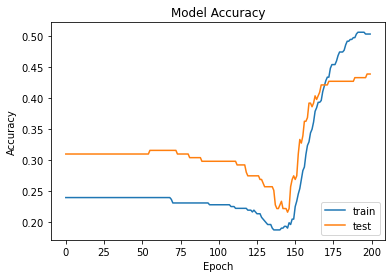

In [55]:
plt.plot(fil_model2.history['accuracy'])
plt.plot(fil_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

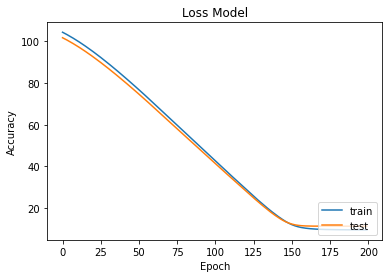

In [56]:
# summarizaion of history for loss
plt.plot(fil_model2.history['loss'])
plt.plot(fil_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#### Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [57]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [58]:
# creating model with ["sigmoid" and "logistic"]
model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) # FIRST LAYER
model3.add(Dense(9,  activation='sigmoid')) #2nd layer
model3.add(Dense(1, activation='tanh')) #3rd layer or op layer

In [59]:
# Compile model
# chaging optimizer older=adadelta/ada, new=adagrad
model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [60]:
# Fit the model
# Change ephocs
fil_model3=model3.fit(x, y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 1s 16ms/step - loss: 1.1466 - accuracy: 0.7572 - val_loss: 1.5270 - val_accuracy: 0.6784
Epoch 2/300
24/24 [==============================] - 0s 4ms/step - loss: 1.1258 - accuracy: 0.7572 - val_loss: 1.5066 - val_accuracy: 0.6784
Epoch 3/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1113 - accuracy: 0.7572 - val_loss: 1.4967 - val_accuracy: 0.6784
Epoch 4/300
24/24 [==============================] - 0s 4ms/step - loss: 1.1021 - accuracy: 0.7572 - val_loss: 1.4881 - val_accuracy: 0.6784
Epoch 5/300
24/24 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.7572 - val_loss: 1.4795 - val_accuracy: 0.6784
Epoch 6/300
24/24 [==============================] - 0s 5ms/step - loss: 1.0863 - accuracy: 0.7572 - val_loss: 1.4731 - val_accuracy: 0.6784
Epoch 7/300
24/24 [==============================] - 0s 5ms/step - loss: 1.0801 - accuracy: 0.7572 - val_loss: 1.4673 - val_accuracy: 0.6784
Epoch 8/300


Epoch 59/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9610 - accuracy: 0.7572 - val_loss: 1.3183 - val_accuracy: 0.6784
Epoch 60/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9598 - accuracy: 0.7572 - val_loss: 1.3166 - val_accuracy: 0.6784
Epoch 61/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9586 - accuracy: 0.7572 - val_loss: 1.3146 - val_accuracy: 0.6784
Epoch 62/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9572 - accuracy: 0.7572 - val_loss: 1.3128 - val_accuracy: 0.6784
Epoch 63/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9558 - accuracy: 0.7572 - val_loss: 1.3112 - val_accuracy: 0.6784
Epoch 64/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9547 - accuracy: 0.7572 - val_loss: 1.3095 - val_accuracy: 0.6784
Epoch 65/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9536 - accuracy: 0.7572 - val_loss: 1.3080 - val_accuracy: 0.6784
Epoch 

24/24 [==============================] - 0s 6ms/step - loss: 0.9052 - accuracy: 0.7572 - val_loss: 1.2378 - val_accuracy: 0.6784
Epoch 117/300
24/24 [==============================] - 0s 6ms/step - loss: 0.9042 - accuracy: 0.7572 - val_loss: 1.2367 - val_accuracy: 0.6784
Epoch 118/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9035 - accuracy: 0.7572 - val_loss: 1.2354 - val_accuracy: 0.6784
Epoch 119/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9026 - accuracy: 0.7572 - val_loss: 1.2341 - val_accuracy: 0.6784
Epoch 120/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9016 - accuracy: 0.7572 - val_loss: 1.2330 - val_accuracy: 0.6784
Epoch 121/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9009 - accuracy: 0.7572 - val_loss: 1.2317 - val_accuracy: 0.6784
Epoch 122/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.7572 - val_loss: 1.2306 - val_accuracy: 0.6784
Epoch 123/300

24/24 [==============================] - 0s 3ms/step - loss: 0.8614 - accuracy: 0.7572 - val_loss: 1.1778 - val_accuracy: 0.6784
Epoch 174/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8606 - accuracy: 0.7572 - val_loss: 1.1769 - val_accuracy: 0.6784
Epoch 175/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8600 - accuracy: 0.7572 - val_loss: 1.1760 - val_accuracy: 0.6784
Epoch 176/300
24/24 [==============================] - 0s 4ms/step - loss: 0.8593 - accuracy: 0.7572 - val_loss: 1.1752 - val_accuracy: 0.6784
Epoch 177/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8587 - accuracy: 0.7572 - val_loss: 1.1742 - val_accuracy: 0.6784
Epoch 178/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.7572 - val_loss: 1.1734 - val_accuracy: 0.6784
Epoch 179/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8574 - accuracy: 0.7572 - val_loss: 1.1723 - val_accuracy: 0.6784
Epoch 180/300

24/24 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.7572 - val_loss: 1.1317 - val_accuracy: 0.6784
Epoch 231/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8281 - accuracy: 0.7572 - val_loss: 1.1310 - val_accuracy: 0.6784
Epoch 232/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8276 - accuracy: 0.7572 - val_loss: 1.1303 - val_accuracy: 0.6784
Epoch 233/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.7572 - val_loss: 1.1296 - val_accuracy: 0.6784
Epoch 234/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.7572 - val_loss: 1.1289 - val_accuracy: 0.6784
Epoch 235/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8261 - accuracy: 0.7572 - val_loss: 1.1280 - val_accuracy: 0.6784
Epoch 236/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.7572 - val_loss: 1.1273 - val_accuracy: 0.6784
Epoch 237/300

24/24 [==============================] - 0s 3ms/step - loss: 0.8007 - accuracy: 0.7572 - val_loss: 1.0915 - val_accuracy: 0.6784
Epoch 288/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8002 - accuracy: 0.7572 - val_loss: 1.0909 - val_accuracy: 0.6784
Epoch 289/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7998 - accuracy: 0.7572 - val_loss: 1.0901 - val_accuracy: 0.6784
Epoch 290/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7993 - accuracy: 0.7572 - val_loss: 1.0895 - val_accuracy: 0.6784
Epoch 291/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7989 - accuracy: 0.7572 - val_loss: 1.0887 - val_accuracy: 0.6784
Epoch 292/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7984 - accuracy: 0.7572 - val_loss: 1.0881 - val_accuracy: 0.6784
Epoch 293/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7980 - accuracy: 0.7572 - val_loss: 1.0873 - val_accuracy: 0.6784
Epoch 294/300

In [61]:
# Evaluating the Model
score3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.8899 - accuracy: 0.7311
accuracy: 73.11%


In [62]:
# Visualzation of Training History, metric name and score
model3.metrics_names, score3 , fil_model3.history.keys()

(['loss', 'accuracy'],
 [0.8898764848709106, 0.731141209602356],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

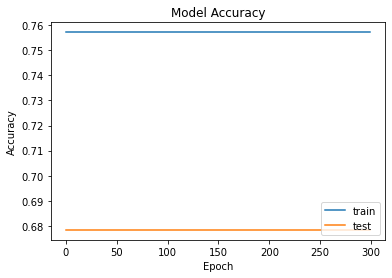

In [63]:
# summarizaion of history for accuracy
plt.plot(fil_model3.history['accuracy'])
plt.plot(fil_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

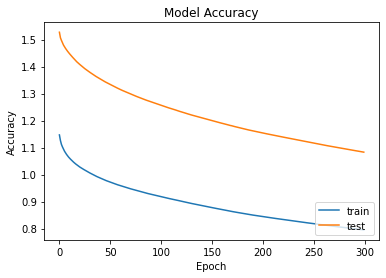

In [64]:
# summarizaion of history for loss
plt.plot(fil_model3.history['loss'])
plt.plot(fil_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#### As per calcluation "Relu" activation function helps to increase accuracy